<a href="https://colab.research.google.com/github/blessondensil294/HR-Analytics-Job-Change-Prediction/blob/master/HR_Analytics_Employee_Enrollement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Janata Hack: HR Analytics Competition

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

Data Dictionary 
Variable

Description

enrollee_id - Unique ID for enrollee

city - City code

city_development_index - Developement index of the city (scaled)

gender - Gender

relevent_experience - Relevent experience

enrolled_university - Type of University course enrolled if any

education_level - Education level

major_discipline - Major discipline

experience - Total experience in years

company_size - No of employees in current employer's company

company_type - Type of current employer

last_new_job - Difference in years between previous job and current job

training_hours - training hours completed

target - 0 – Not looking for job change, 1 – Looking for a job change

 

## Load the Data

### From Github

In [0]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/HR-Analytics-Job-Change-Prediction/master/Data/test_KaymcHn.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/HR-Analytics-Job-Change-Prediction/master/Data/train_jqd04QH.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [0]:
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [0]:
df_Train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [0]:
df_Train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [0]:
df_Train.shape

(18359, 14)

In [0]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

# Feature Engineering

### Fill Missing Values

Replace the Value in the Company Size from Oct-49 to 10-49

In [0]:
df_Train['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [0]:
df_Train['company_size'] = df_Train['company_size'].replace('10/49','10-49')

In [0]:
df_Train['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10-49'], dtype=object)

Missing Values

In [0]:
df_Train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [0]:
df_Train['gender'] = df_Train['gender'].fillna('Other')
df_Test['gender'] = df_Test['gender'].fillna('Other')
df_Train['enrolled_university'] = df_Train['enrolled_university'].fillna('no_enrollment')
df_Test['enrolled_university'] = df_Test['enrolled_university'].fillna('no_enrollment')
df_Train['education_level'] = df_Train['education_level'].fillna('Unknown')
df_Test['education_level'] = df_Test['education_level'].fillna('Unknown')
df_Train['major_discipline'] = df_Train['major_discipline'].fillna('Other')
df_Test['major_discipline'] = df_Test['major_discipline'].fillna('Other')
df_Train['experience'] = df_Train['experience'].fillna('None')
df_Test['experience'] = df_Test['experience'].fillna('None')
df_Train['company_size'] = df_Train['company_size'].replace('10/49','10-49')
df_Train['company_size'] = df_Train['company_size'].fillna('None')
df_Test['company_size'] = df_Test['company_size'].fillna('None')
df_Train['company_type'] = df_Train['company_type'].fillna('None')
df_Test['company_type'] = df_Test['company_type'].fillna('None')
df_Train['last_new_job'] = df_Train['last_new_job'].fillna('None')
df_Test['last_new_job'] = df_Test['last_new_job'].fillna('None')

In [0]:
df_Train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## Encoding of the Columns

### For other Algorithms

In [0]:
df_Train.shape

(18359, 14)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Train = pd.get_dummies(df_Train, columns=["city"])
df_Test = pd.get_dummies(df_Test, columns=["city"])
df_Train = pd.get_dummies(df_Train, columns=["gender"])
df_Test = pd.get_dummies(df_Test, columns=["gender"])
df_Train['relevent_experience'] = le.fit_transform(df_Train['relevent_experience'])
df_Test['relevent_experience'] = le.fit_transform(df_Test['relevent_experience'])
df_Train = pd.get_dummies(df_Train, columns=["enrolled_university"])
df_Test = pd.get_dummies(df_Test, columns=["enrolled_university"])
df_Train = pd.get_dummies(df_Train, columns=["education_level"])
df_Test = pd.get_dummies(df_Test, columns=["education_level"])
df_Train = pd.get_dummies(df_Train, columns=["major_discipline"])
df_Test = pd.get_dummies(df_Test, columns=["major_discipline"])
df_Train = pd.get_dummies(df_Train, columns=["experience"])
df_Test = pd.get_dummies(df_Test, columns=["experience"])
df_Train = pd.get_dummies(df_Train, columns=["company_size"])
df_Test = pd.get_dummies(df_Test, columns=["company_size"])
df_Train = pd.get_dummies(df_Train, columns=["company_type"])
df_Test = pd.get_dummies(df_Test, columns=["company_type"])
df_Train = pd.get_dummies(df_Train, columns=["last_new_job"])
df_Test = pd.get_dummies(df_Test, columns=["last_new_job"])

In [0]:
df_Train.shape

(18359, 192)

In [0]:
df_Train.head()

,enrollee_id,city_development_index,relevent_experience,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,...,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_None,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_None,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_None,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_None,last_new_job_never
0,23798,0.689,0,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,29166,0.923,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,46,0.910,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,18527,0.666,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,21751,0.887,1,88,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


### For Tree Based Algorithm

In [0]:
df_Train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [0]:
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,Other,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,Other,No relevent experience,no_enrollment,Masters,STEM,8,None,None,2,88,1


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Train['city'] = le.fit_transform(df_Train['city'])
df_Test['city'] = le.fit_transform(df_Test['city'])
df_Train['gender'] = le.fit_transform(df_Train['gender'])
df_Test['gender'] = le.fit_transform(df_Test['gender'])
df_Train['relevent_experience'] = le.fit_transform(df_Train['relevent_experience'])
df_Test['relevent_experience'] = le.fit_transform(df_Test['relevent_experience'])
df_Train['enrolled_university'] = le.fit_transform(df_Train['enrolled_university'])
df_Test['enrolled_university'] = le.fit_transform(df_Test['enrolled_university'])
df_Train['education_level'] = le.fit_transform(df_Train['education_level'])
df_Test['education_level'] = le.fit_transform(df_Test['education_level'])
df_Train['major_discipline'] = le.fit_transform(df_Train['major_discipline'])
df_Test['major_discipline'] = le.fit_transform(df_Test['major_discipline'])
df_Train['experience'] = le.fit_transform(df_Train['experience'])
df_Test['experience'] = le.fit_transform(df_Test['experience'])
df_Train['company_size'] = le.fit_transform(df_Train['company_size'])
df_Test['company_size'] = le.fit_transform(df_Test['company_size'])
df_Train['company_type'] = le.fit_transform(df_Train['company_type'])
df_Test['company_type'] = le.fit_transform(df_Test['company_type'])
df_Train['last_new_job'] = le.fit_transform(df_Train['last_new_job'])
df_Test['last_new_job'] = le.fit_transform(df_Test['last_new_job'])
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,1,0,2,0,5,13,1,6,0,106,0
1,29166,112,0.923,1,0,2,0,5,5,7,1,0,69,0
2,46,48,0.910,2,0,2,0,5,16,4,5,1,4,0
3,18527,93,0.666,1,0,2,0,5,5,4,6,0,26,0
4,21751,2,0.887,2,1,2,2,5,18,8,3,1,88,1


### Scaling the Columns

In [25]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_Train[['training_hours']] = mm_scaler.fit_transform(df_Train[['training_hours']])
df_Test[['training_hours']] = mm_scaler.fit_transform(df_Test[['training_hours']])
df_Train.head()

,enrollee_id,city_development_index,relevent_experience,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,...,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_None,company_size_10-49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_None,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_None,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_None,last_new_job_never
0,23798,0.689,0,0.313433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,29166,0.923,0,0.202985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,46,0.910,0,0.008955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,18527,0.666,0,0.074627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,21751,0.887,1,0.259701,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## Feature Selection

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


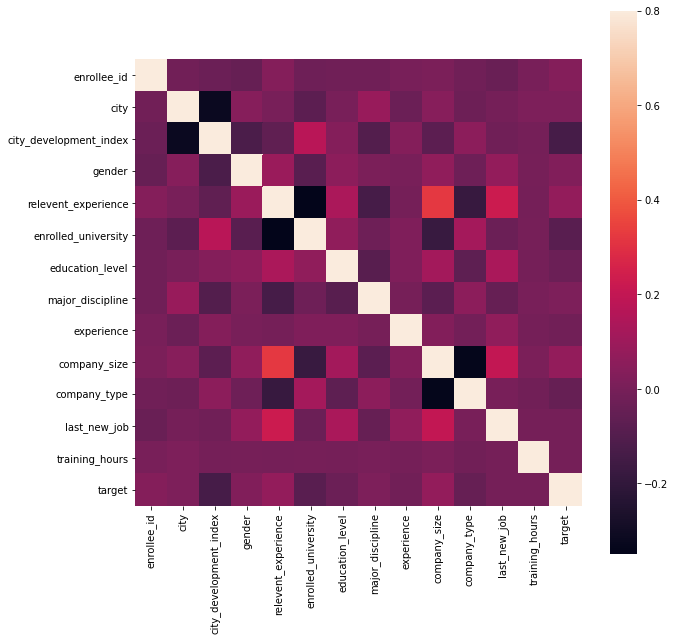

In [0]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

# Data Modeling

## Split and Balancing the Data

In [0]:
x = df_Train
x = x.drop(['enrollee_id'], axis=1)
x = x.drop(['target'], axis=1)
y = df_Train['target']
x_pred = df_Test
x_pred = x_pred.drop(['enrollee_id'], axis=1)

In [0]:
x.shape

(18359, 12)

In [27]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')
x_sm, y_sm = sm.fit_resample(x,y)
x_sm = pd.DataFrame(x_sm)
x_sm.columns = x.columns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_sm.shape

(31868, 190)

## Cat Boosting

In [0]:
pip install catboost

In [0]:

from catboost import CatBoostClassifier
cb_cl = CatBoostClassifier(learning_rate=0.10, n_estimators=500, subsample=0.80, max_depth=5,scale_pos_weight=2.5)

In [0]:
cb_cl.fit(x_sm,np.ravel(y_sm))

0:	learn: 0.6687754	total: 67.9ms	remaining: 33.9s
1:	learn: 0.6482414	total: 83.8ms	remaining: 20.9s
2:	learn: 0.6321811	total: 100ms	remaining: 16.6s
3:	learn: 0.6205168	total: 116ms	remaining: 14.3s
4:	learn: 0.6101173	total: 129ms	remaining: 12.8s
5:	learn: 0.6018459	total: 143ms	remaining: 11.8s
6:	learn: 0.5948968	total: 159ms	remaining: 11.2s
7:	learn: 0.5892743	total: 174ms	remaining: 10.7s
8:	learn: 0.5848275	total: 190ms	remaining: 10.4s
9:	learn: 0.5813343	total: 205ms	remaining: 10s
10:	learn: 0.5779774	total: 221ms	remaining: 9.81s
11:	learn: 0.5758920	total: 234ms	remaining: 9.52s
12:	learn: 0.5734395	total: 250ms	remaining: 9.37s
13:	learn: 0.5715964	total: 265ms	remaining: 9.21s
14:	learn: 0.5697885	total: 283ms	remaining: 9.15s
15:	learn: 0.5680116	total: 298ms	remaining: 9.02s
16:	learn: 0.5663433	total: 313ms	remaining: 8.89s
17:	learn: 0.5653046	total: 328ms	remaining: 8.78s
18:	learn: 0.5644786	total: 342ms	remaining: 8.66s
19:	learn: 0.5634178	total: 357ms	remaini

In [0]:
y_pred = cb_cl.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'enrollee_id':df_Test['enrollee_id'], 'target':y_pred})
submission_df.to_csv('Sample Submission.csv', index=False)

## Support Vector Machine

In [0]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', C=100, gamma='auto') AUC Score - .6317
#sv = SVC(kernel='poly', C=100, gamma='auto') AUC SCore - .6291

In [0]:
sv.fit(x_sm, np.ravel(y_sm))

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = sv.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'enrollee_id':df_Test['enrollee_id'], 'target':y_pred})
submission_df.to_csv('Sample Submission.csv', index=False)

In [0]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['poly']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2) 
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
print(grid.best_estimator_)

## Neural Network

In [0]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [0]:
x_sm.shape

(31868, 190)

In [0]:
model = Sequential()

model.add(Dense(30, input_shape=(190,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
history = model.fit(x_sm, np.ravel(y_sm), batch_size=1000, epochs=500, verbose=2)

Epoch 1/500
 - 1s - loss: 0.4758 - accuracy: 0.7555
Epoch 2/500
 - 1s - loss: 0.4760 - accuracy: 0.7531
Epoch 3/500
 - 1s - loss: 0.4783 - accuracy: 0.7525
Epoch 4/500
 - 1s - loss: 0.4724 - accuracy: 0.7573
Epoch 5/500
 - 1s - loss: 0.4762 - accuracy: 0.7523
Epoch 6/500
 - 1s - loss: 0.4705 - accuracy: 0.7562
Epoch 7/500
 - 1s - loss: 0.4698 - accuracy: 0.7578
Epoch 8/500
 - 1s - loss: 0.4722 - accuracy: 0.7533
Epoch 9/500
 - 1s - loss: 0.4770 - accuracy: 0.7503
Epoch 10/500
 - 1s - loss: 0.4726 - accuracy: 0.7533
Epoch 11/500
 - 1s - loss: 0.4720 - accuracy: 0.7544
Epoch 12/500
 - 1s - loss: 0.4732 - accuracy: 0.7536
Epoch 13/500
 - 1s - loss: 0.4697 - accuracy: 0.7555
Epoch 14/500
 - 1s - loss: 0.4734 - accuracy: 0.7543
Epoch 15/500
 - 1s - loss: 0.4733 - accuracy: 0.7539
Epoch 16/500
 - 1s - loss: 0.4751 - accuracy: 0.7536
Epoch 17/500
 - 1s - loss: 0.4743 - accuracy: 0.7535
Epoch 18/500
 - 1s - loss: 0.4691 - accuracy: 0.7581
Epoch 19/500
 - 1s - loss: 0.4726 - accuracy: 0.7526
Ep

In [0]:
y_pred = model.predict_classes(x_pred)
y_pred = y_pred.reshape(15021,)

In [0]:
submission_df = pd.DataFrame({'enrollee_id':df_Test['enrollee_id'], 'target':y_pred})
submission_df.to_csv('Sample Submission.csv', index=False)

### SVM SGD Classifier

In [0]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='hinge', penalty='elasticnet', fit_intercept=True, 
                     max_iter=1000, shuffle=True, n_jobs=-1, random_state=294, learning_rate='optimal',
                     early_stopping=False, n_iter_no_change=5, class_weight='balanced',
                     warm_start=False, average=False) #AUC Score - .6317

In [30]:
sgdc.fit(x_sm, np.ravel(y_sm))

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=294, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = sv.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'enrollee_id':df_Test['enrollee_id'], 'target':y_pred})
submission_df.to_csv('Sample Submission_sgdc.csv', index=False)